<a href="https://colab.research.google.com/github/u1353279/DATA_PHD/blob/main/Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Degredation Analysis for Bedford PV-01

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [21]:
bedford_1 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Bedford1.csv')

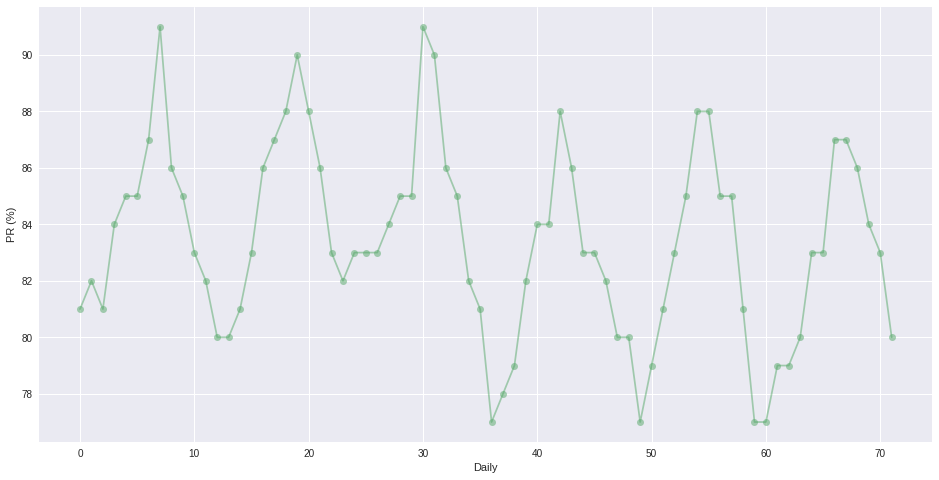

In [49]:
fig, axs = plt.subplots()
axs.plot(bedford_1.index, df.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Daily')

resolution = 12
s=sm.tsa.seasonal_decompose(bedford_1.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [23]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [24]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           3.59e-17
Time:                        17:47:15   Log-Likelihood:                -57.052
No. Observations:                  60   AIC:                             118.1
Df Residuals:                      58   BIC:                             122.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.4024      0.188    455.390      0.000      85.027      85.778
x1            -0.0564      0.005    -11.880      0.000      -0.066      -0.047
==============================================================================
Omnibus:                        4.396   Durbin-Watson:                   0.054
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                3.466
Skew:                           0.466   Prob(JB):                        0.177
Kurtosis:                       2.281   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.68

In [26]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-0.79

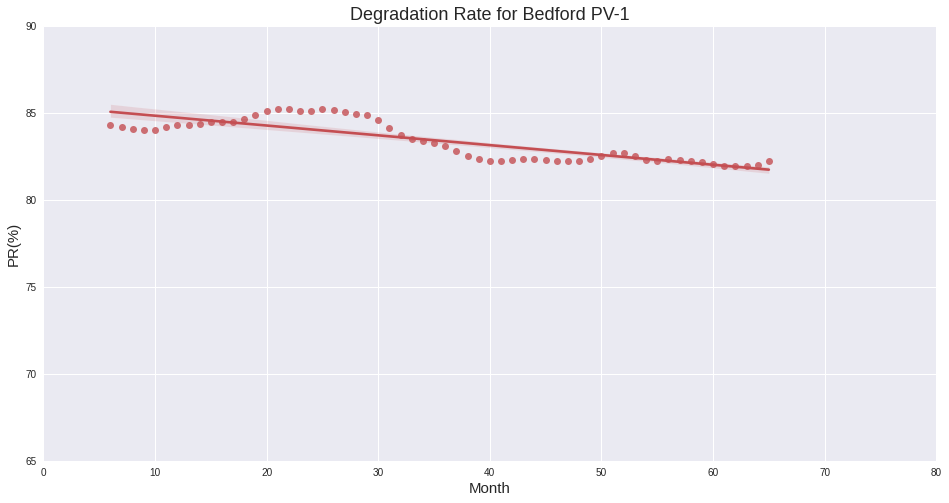

In [55]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = bedford_1, color='r')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for Bedford PV-1",fontsize=18)
plt.grid(True)
plt.show()